In [11]:
import os
import warnings
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns

file_path = r"C:\Users\Sacha\Documents\BeCode\real-estate-price-prediction\data_analysis\analyse_csv.csv" 
df_final = pd.read_csv(file_path)

In [12]:
#delete outliers 
df_final = df_final[df_final['Price'] < 1000000]
print(df_final.shape)

(10841, 11)


In [13]:
df_train = df_final.sample(frac=0.8,random_state=42)
df_test = df_final.drop(df_train.index)

In [14]:
area = df_train["Living_Area"]
df_train["Median_Price_Squared_Meter"] = df_train["Price"] / area
median_price_meter = df_train.groupby("Locality")["Median_Price_Squared_Meter"].median()

In [15]:
df_test = pd.merge(df_test, median_price_meter, on = 'Locality')
#df_test.shape #some localities aren't in the train df

In [16]:
#based on the Living Area of the property and the price per square meter of the locality, compute the supposed Price of the property 
df_test['Supposed_Price'] = df_test['Living_Area'] * df_test['Median_Price_Squared_Meter']

In [17]:
df_test = df_test.groupby('Price').sample()

<function matplotlib.pyplot.show(close=None, block=None)>

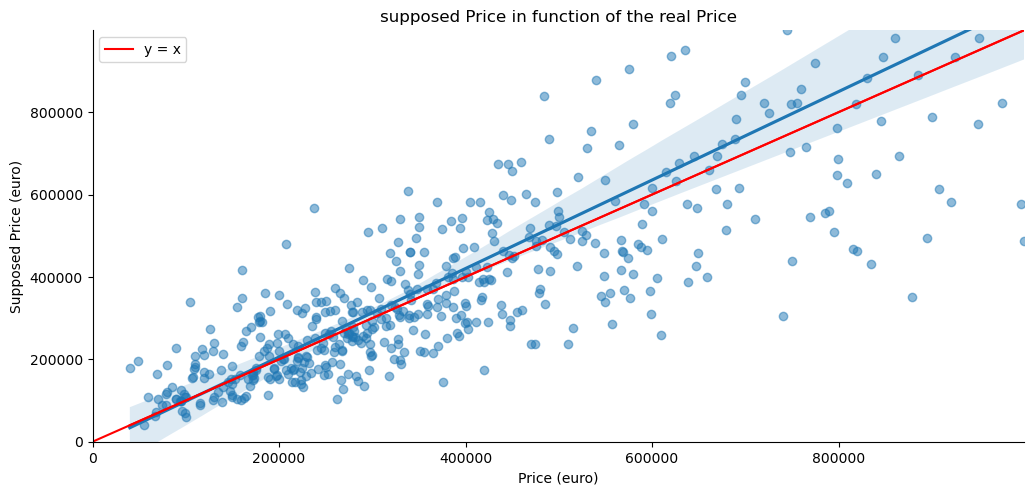

In [21]:
sns.lmplot(x="Price", y="Supposed_Price", data=df_test, scatter_kws={'alpha':0.5}, aspect=2)
sns.lineplot(x=df_test["Price"], y=df_test["Price"], label='y = x', color='red')

plt.xlabel('Price (euro)')
plt.ylabel('Supposed Price (euro)')

# Add line y=x
plt.plot([0, max(df_test["Price"])], [0, max(df_test["Price"])], 'r-', label='y = x')

plt.xlim(0, max(df_test["Price"]))
plt.ylim(0, max(df_test["Price"]))

plt.title('supposed Price in function of the real Price')

plt.savefig(r'.\images\prediction_price.png', bbox_inches='tight')
plt.show